dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.965923 to fit


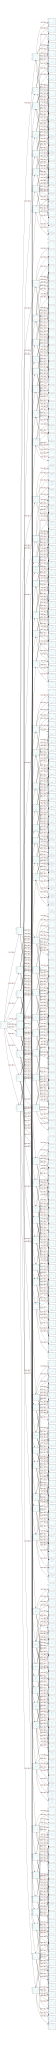

In [1]:
!pip install graphviz

from graphviz import Digraph

def board_to_str(board):
    """Convert 1D board list to multiline string for node label"""
    lines = []
    for i in range(3):
        row = board[3*i:3*i+3]
        lines.append(" | ".join(row))
        if i < 2:
            lines.append("---------")
    return "\n".join(lines)

def next_states(board, player):
    """Generate all possible next board states from current board"""
    states = []
    for i in range(9):
        if board[i] == '-':
            new_board = board.copy()
            new_board[i] = player
            states.append(new_board)
    return states

def switch_player(player):
    return 'O' if player == 'X' else 'X'

def board_to_id(board):
    """Generate a unique ID for a board state (string)"""
    return "".join(board)

# Build the state space tree (limited depth for simplicity)
def build_tree(dot, board, player, depth, max_depth, visited):
    if depth > max_depth:
        return
    node_id = board_to_id(board)
    if node_id in visited:
        return
    visited.add(node_id)

    # Add current board as node with formatted label
    dot.node(node_id, board_to_str(board))

    # Generate children
    for next_board in next_states(board, player):
        child_id = board_to_id(next_board)
        move_pos = [i for i in range(9) if board[i] != next_board[i]][0]
        move_label = f"{player} plays ({move_pos // 3}, {move_pos % 3})"
        dot.node(child_id, board_to_str(next_board))
        dot.edge(node_id, child_id, label=move_label)
        build_tree(dot, next_board, switch_player(player), depth + 1, max_depth, visited)

# Initialize graph
dot = Digraph(comment='Tic Tac Toe State Space')
dot.attr(rankdir='LR')  # left to right layout for better horizontal viewing
dot.attr('node', shape='box', fontname="Courier")

# Empty board initialization
initial_board = ['-'] * 9
max_depth = 2  # Adjust this to control tree size (max number of moves)

# Build tree starting with X to move
build_tree(dot, initial_board, 'X', depth=0, max_depth=max_depth, visited=set())

# Render and display in notebook
dot.render('tic_tac_toe_tree', format='png', cleanup=True)
dot


In [9]:
def print_board(board):
    for i in range(3):
        print(" | ".join(board[3*i:3*i+3]))
        if i < 2:
            print("---------")
    print()

def is_winner(board, player):
    wins = [
        [0,1,2],[3,4,5],[6,7,8],  # rows
        [0,3,6],[1,4,7],[2,5,8],  # cols
        [0,4,8],[2,4,6]           # diagonals
    ]
    return any(all(board[pos] == player for pos in line) for line in wins)

def is_draw(board):
    return '-' not in board and not is_winner(board, 'X') and not is_winner(board, 'O')

def evaluate(board):
    if is_winner(board, 'X'):
        return 1
    elif is_winner(board, 'O'):
        return -1
    else:
        return 0

def minimax(board, player):
    if is_winner(board, 'X') or is_winner(board, 'O') or is_draw(board):
        return evaluate(board), None

    if player == 'X':
        best_val = -float('inf')
        best_move = None
        for i in range(9):
            if board[i] == '-':
                board[i] = player
                val, _ = minimax(board, 'O')
                board[i] = '-'
                if val > best_val:
                    best_val = val
                    best_move = i
        return best_val, best_move
    else:  # player == 'O'
        best_val = float('inf')
        best_move = None
        for i in range(9):
            if board[i] == '-':
                board[i] = player
                val, _ = minimax(board, 'X')
                board[i] = '-'
                if val < best_val:
                    best_val = val
                    best_move = i
        return best_val, best_move

def generate_next_states(board, player):
    next_states = []
    for i in range(9):
        if board[i] == '-':
            new_board = board.copy()
            new_board[i] = player
            next_states.append((i, new_board))
    return next_states

user_input = input("Enter current board (9 chars X,O,-): ").strip().upper()
board = list(user_input)

count_x = board.count('X')
count_o = board.count('O')
if count_x == count_o:
    player = 'X'
elif count_x == count_o + 1:
    player = 'O'
else:
    player = 'X'

print(f"\nNext player to move: {player}\n")

next_moves = generate_next_states(board, player)

print(f"Total possible moves: {len(next_moves)}\n")

for move_pos, next_board in next_moves:
    print(f"Move: {player} at position ({move_pos // 3}, {move_pos % 3})")
    print_board(next_board)

score, best_move = minimax(board, player)
if best_move is not None:
    print(f"Best move for {player} is at position ({best_move // 3}, {best_move % 3}) with score {score}")
    board[best_move] = player
    print_board(board)
else:
    print("No moves possible or game over.")
print("Name: K. Keerthi Reddy")
print("USN: 1BM23CS137")


Enter current board (9 chars X,O,-): X-O--X---

Next player to move: O

Total possible moves: 6

Move: O at position (0, 1)
X | O | O
---------
- | - | X
---------
- | - | -

Move: O at position (1, 0)
X | - | O
---------
O | - | X
---------
- | - | -

Move: O at position (1, 1)
X | - | O
---------
- | O | X
---------
- | - | -

Move: O at position (2, 0)
X | - | O
---------
- | - | X
---------
O | - | -

Move: O at position (2, 1)
X | - | O
---------
- | - | X
---------
- | O | -

Move: O at position (2, 2)
X | - | O
---------
- | - | X
---------
- | - | O

Best move for O is at position (1, 0) with score 0
X | - | O
---------
O | - | X
---------
- | - | -

Name: K. Keerthi Reddy
USN: 1BM23CS137


In [10]:
import time

def get_bool_input(prompt):
    while True:
        val = input(prompt + " (Y/N): ").strip().upper()
        if val == 'Y':
            return True
        elif val == 'N':
            return False
        else:
            print("Please enter Y or N.")

def get_location_input(prompt):
    while True:
        val = input(prompt + " (A/B): ").strip().upper()
        if val in ['A', 'B']:
            return val
        else:
            print("Please enter A or B.")

class TwoRoomEnvironment:
    def __init__(self, dirt_status, agent_location='A'):
        self.dirt = dirt_status
        self.agent_location = agent_location

    def perceive(self):
        return self.agent_location, self.dirt[self.agent_location]

    def clean(self):
        if self.dirt[self.agent_location]:
            self.dirt[self.agent_location] = False
            print(f"Cleaned room {self.agent_location}")

    def move_left(self):
        self.agent_location = 'A'
        print("Moved Left to room A")

    def move_right(self):
        self.agent_location = 'B'
        print("Moved Right to room B")

    def all_clean(self):
        return not (self.dirt['A'] or self.dirt['B'])

    def status(self):
        print(f"Current Status: Room A: {'Dirty' if self.dirt['A'] else 'Clean'}, "
              f"Room B: {'Dirty' if self.dirt['B'] else 'Clean'}, Agent at Room {self.agent_location}")

class SimpleReflexAgentTwoRooms:
    def __init__(self, environment):
        self.env = environment

    def act(self):
        location, dirty = self.env.perceive()
        if dirty:
            print(f"Dirt detected in room {location}!")
            self.env.clean()
            return 'S'  # Clean
        else:
            if location == 'A':
                self.env.move_right()
                return 'R'
            else:
                self.env.move_left()
                return 'L'

print("Set initial conditions for the vacuum cleaning agent:")

roomA_dirty = get_bool_input("Is room A dirty?")
roomB_dirty = get_bool_input("Is room B dirty?")
agent_start = get_location_input("Where should the agent start?")

env = TwoRoomEnvironment({'A': roomA_dirty, 'B': roomB_dirty}, agent_start)
agent = SimpleReflexAgentTwoRooms(env)

print("\nStarting cleaning process...\n")
time.sleep(1)

steps = 0
while not env.all_clean():
    env.status()
    action = agent.act()
    steps += 1
    time.sleep(1)  # wait 1 second before next action

print("\nAll rooms are clean! Cleaning complete.")
print(f"Total steps taken: {steps}")
print("Name: K. Keerthi Reddy")
print("USN: 1BM23CS137")


Set initial conditions for the vacuum cleaning agent:
Is room A dirty? (Y/N): y
Is room B dirty? (Y/N): y
Where should the agent start? (A/B): a

Starting cleaning process...

Current Status: Room A: Dirty, Room B: Dirty, Agent at Room A
Dirt detected in room A!
Cleaned room A
Current Status: Room A: Clean, Room B: Dirty, Agent at Room A
Moved Right to room B
Current Status: Room A: Clean, Room B: Dirty, Agent at Room B
Dirt detected in room B!
Cleaned room B

All rooms are clean! Cleaning complete.
Total steps taken: 3
Name: K. Keerthi Reddy
USN: 1BM23CS137
